In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/MyDrive/PFA-Dataset/datas/data.csv')
df=df_1.copy()
df.head()

,username,posts_count,followers_count,followees_count,post_ids,post_captions,posts,primary_bio,secondary_bio,most_recent_date,least_recent_date
0,yoorajung,93,285 k,363,76a6b73f-4b89-4937-8fe4-5fb1115444d8|b997d31a-...,cafe hopping|Which outfit is your favorite? Us...,posts\yoorajung\76a6b73f-4b89-4937-8fe4-5fb111...,NaN,☁️ 𐙚 . ˙ 𖧧 ₊ ˚ 🐇\n📧 yoora@smallscreenmarketing...,2024-04-06,2017-08-30
1,zendaya,3491,184 M,0,c147079a-4370-484c-9cbf-ab70696dc1a1|d3bcc126-...,First stop on the @challengersmovie press tour...,posts\zendaya\c147079a-4370-484c-9cbf-ab70696d...,NaN,@challengersmovie April 26th\n@dunemovie\n@eup...,2024-04-23,2021-04-20
2,vancityreynolds,823,"51,3 M",992,ab27498f-3ab3-4491-a274-a2fa7970470d|ed8691fd-...,Some compound interesting news out of Wrexham ...,posts\vancityreynolds\ab27498f-3ab3-4491-a274-...,NaN,Owner @aviationgin & @mintmobile @maximumeffor...,2024-04-25,2023-02-09
3,toby.hadoke,574,2 212,470,acc4e83c-a693-4463-b534-bf799060b873|0bba1fd2-...,Photo by Toby Hadoke in 53two. May be an image...,posts\toby.hadoke\acc4e83c-a693-4463-b534-bf79...,NaN,"Actor, writer, comedian, professional anorak. ...",2024-04-27,2023-09-06
4,tomhanks,296,"9,5 M",1,d934c4b7-cea3-4fd2-92bd-bf9201445a4c|4012197c-...,Two great American traditions: baseball and a ...,posts\tomhanks\d934c4b7-cea3-4fd2-92bd-bf92014...,NaN,I'm that actor in some of the movies you liked...,2024-04-23,2020-01-07


In [ ]:
df.fillna('', inplace=True)


In [ ]:
print(df['post_captions'][23])


Photo by Mallory Pruitt on March 25, 2024. May be an image of 1 person, wetsuit and underwear.|Hiii 💗 @__outcastclothing|🐴🤠|din din with @pastaconfidential 🍝|in my country girl era 🤠|Rainy days in LA|So who is matching me now that my newest bikini just dropped?|Photo by Mallory Pruitt in Joshua Tree, California. May be an image of 1 person, polaroid, miniskirt, portable cassette player, turtleneck and text.|superwoman|Do I look like I know how to change a tire?|when in rome|Photo shared by Mallory Pruitt on January 15, 2024 tagging @anastasiabeverlyhills, @zombiemodelmgmt, and @therebellionmgmt. May be an image of one or more people, makeup, lipstick, eyeliner and cosmetics.|Woke up in Barcelona ☕️|i 🫶🏼 roma|Photo by Mallory Pruitt in New York City.|new york during the holidays hits different|picked up some $1 books 🫶🏼📚|Hi|Photo by Mallory Pruitt on November 27, 2023.|can’t believe this is my backyard <3|Photo by Mallory Pruitt on November 17, 2023.|days in malibu >|What?? You don’t we

In [ ]:
print(df.dtypes)

username             object
posts_count          object
followers_count      object
followees_count      object
post_ids             object
post_captions        object
posts                object
primary_bio          object
secondary_bio        object
most_recent_date     object
least_recent_date    object
dtype: object


In [ ]:
from array import array
import numpy as np
import re

def convert_to_numeric(value):
    value_str = str(value).strip()
  # Remove the non-breaking space character before conversion
    value_str = value_str.replace('\u202f', '')
    value_str = value_str.replace(',', '.')  # Replace commas with dots
    if 'k' in value_str:
        return int(float(value_str.replace('k', '')) * 1000)
    elif 'M' in value_str:
        return int(float(value_str.replace('M', '')) * 1000000)
    else :
       return(int(value_str))


def split_objects(obj_str):
    return obj_str.split("|")

# Define a function to count emojis
def count_emojis(text):
    emoji_pattern = r'(\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff])'
    emojis = re.findall(emoji_pattern, text)  # Find all emojis in the text using a regular expression pattern
    return len(emojis) # Count the number of emojis found




In [ ]:
def extract_hashtags(captions_list):
    hashtags_list = []
    cleaned_captions_list = []
    for caption in captions_list:
        if isinstance(caption, str):
            hashtags = re.findall(r'#\w+', caption)  # Extract hashtags using regex
            if hashtags:
                hashtags_list.append(hashtags)  # Append list of hashtags
            else:
                hashtags_list.append([])  # Append empty list if no hashtags found
            caption_cleaned = re.sub(r'#\w+', '', caption)  # Remove hashtags from caption
            cleaned_captions_list.append(caption_cleaned.strip())
        else:
            hashtags_list.append([])  # Append empty list for non-string captions
            cleaned_captions_list.append('')
    return hashtags_list, cleaned_captions_list

# get list of unique hashtags
import pandas as pd
import re
def extract_unique_hashtags(captions_list):
    hashtags_list = []
    for caption in captions_list:
        if isinstance(caption, str):
            hashtags = re.findall(r'#\w+', caption)  # Extract hashtags using regex
            hashtags_list.extend(hashtags)
        else:
            hashtags_list.append('')
    return hashtags_list

In [ ]:
def fix_columns(df):
    df['followers_count'] = df['followers_count'].apply(convert_to_numeric)
    df['followees_count'] = df['followees_count'].apply(convert_to_numeric)
    df['posts_count'] = df['posts_count'].apply(convert_to_numeric)

    df['least_recent_date'] = pd.to_datetime(df['least_recent_date'])
    df['most_recent_date'] = pd.to_datetime(df['most_recent_date'])

    df["post_ids"]=df["post_ids"].apply(split_objects)
    df["post_captions"]=df["post_captions"].apply(split_objects)
    df["post_captions"]=[[re.sub(r'photo.*$', '', x, flags=re.IGNORECASE)for x in c] for c in df['post_captions']]
    df["posts"]=df["posts"].apply(split_objects)

    df['username'] = df['username'].astype(str)
    df['bio'] = (df['primary_bio'].astype(str)+df['secondary_bio'].astype(str)).astype(str)

def add_features(df):
    df['len_caption'] = [[len(x) for x in c] for c in df['post_captions']]
    df['len_bio'] = len(df['bio'])
    df['avg_len_caption'] = df['len_caption'].apply(lambda x: np.average(x) if len(x) > 0 else 0)
    df['nb_hashtags'] = df['post_captions'].apply(lambda x: sum([caption.count('#') for caption in x]))
    df['nb_mentions'] = df['post_captions'].apply(lambda x: sum([caption.count('@') for caption in x]))
    df['duration'] = (df['most_recent_date'] - df['least_recent_date']).dt.days
    df['frequency'] = df.apply(lambda row: row['duration'] / len(row['post_ids']), axis=1)
    df['nb_emoji']= [[count_emojis(x) for x in c] for c in df['post_captions']]
    df['avg_emojis'] = df['nb_emoji'].apply(lambda x: np.average(x) if len(x) > 0 else 0)
    df['hashtags_unique'] = df['post_captions'].apply(extract_unique_hashtags)
    df[['hashtags', 'cleaned_captions']] = df['post_captions'].apply(lambda x: pd.Series(extract_hashtags(x)))



# modify count emojis
# add nbre of tags

In [ ]:
fix_columns(df)
add_features(df)

In [ ]:
print(df.iloc[0])

username                                                     yoorajung
posts_count                                                         93
followers_count                                                 285000
followees_count                                                    363
post_ids             [76a6b73f-4b89-4937-8fe4-5fb1115444d8, b997d31...
post_captions        [cafe hopping, Which outfit is your favorite? ...
posts                [posts\yoorajung\76a6b73f-4b89-4937-8fe4-5fb11...
primary_bio                                                           
secondary_bio        ☁️ 𐙚 . ˙ 𖧧 ₊ ˚ 🐇\n📧 yoora@smallscreenmarketing...
most_recent_date                                   2024-04-06 00:00:00
least_recent_date                                  2017-08-30 00:00:00
bio                                                        cloud email
len_caption          [12, 296, 1, 462, 8, 0, 1, 25, 59, 86, 40, 32,...
len_bio                                                             24
avg_le

In [ ]:
print(df.dtypes)

username                     object
posts_count                   int64
followers_count               int64
followees_count               int64
post_ids                     object
post_captions                object
posts                        object
primary_bio                  object
secondary_bio                object
most_recent_date     datetime64[ns]
least_recent_date    datetime64[ns]
bio                          object
len_caption                  object
len_bio                       int64
avg_len_caption             float64
nb_hashtags                   int64
nb_mentions                   int64
duration                      int64
frequency                   float64
nb_emoji                     object
avg_emojis                  float64
hashtags_unique              object
hashtags                     object
cleaned_captions             object
dtype: object


In [ ]:
print(df["cleaned_captions"][0])

['cafe hopping', 'Which outfit is your favorite? Use code YOORA for 40% off at Lewkin @lewkinofficial  \n\n〰 Outfit info \nOutfit 1: S180974, S180977, S115904\nOutfit 2: S180782, S180786\nOutfit 3: S180943, S179822\nOutfit 4: S179822, S179822\nOutfit 5: S180290, S178096\nOutfit 6: S180892, S180897, S180901', '🧸', 'sponsored by @wooltari_usa 〰 Get $20 off korean food from Wooltari using YOORA20 (available until the end of March, 2024 & limited to one time use per customer). \n\nAlso get free shipping on first orders over $129 + instant $10 points upon registration! They have $1 deals for new customers including , , (fish-shaped bread), and more!', 'tanghulu', '', '🐈', 'pt 2 ‼️ [GIVEAWAY CLOSED]', 'golden hour @lewkinofficial', 'the urge to start a collection 🔝   @miniso.official', 'like why am i still pulling all-nighters', 'outfit from @nevstudiostreetwear', '🔐', 'pt 1', '🐸', '🤓', '🌃', '☁️', 'iced americanos \U0001faf6', 'nyc dump', '💭', '💞', '반오십', '💬', '', '\U0001fae6', '📍LA', '❄️', 

In [ ]:
print(len(df['hashtags'][11]), len(df['cleaned_captions'][11]),len(df['post_captions'][11]))

100 100 100


In [ ]:
print(df['hashtags'][11])

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['#35mm'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['#casualforacause', '#cozytogether'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


## Preprocessing captions


In [ ]:
! pip install emoji

In [ ]:
! pip install langid

* \u00a9:the copyright symbol © (Unicode codepoint U+00A9).
* \u00ae:the registered trademark symbol ® (Unicode codepoint U+00AE).
* [\u2000-\u3300]: This range covers various punctuation symbols, whitespace characters, and some mathematical symbols. However, it might not capture all emoji characters.

* \ud83c[\ud000-\udfff]: This part targets emoji characters specifically. It matches a sequence starting with \ud83c (which represents the beginning of an emoji in UTF-16 encoding) followed by any character between \ud000 and \udfff. This covers a vast majority of emojis.

* \ud83d[\ud000-\udfff]: Similar to the previous one, this targets another range of emoji characters starting with \ud83d.
* \ud83e[\ud000-\udfff]: This covers a less common range of emojis starting with \ud83e.

In [ ]:
import string  # Commented out as it's not used in this code snippet
import re  # Importing re module for regular expressions
import nltk
from nltk.corpus import stopwords
import langid
import emoji

nltk.download('stopwords')

# Define a function to strip all entities from text
def strip_all_entities(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.replace('\r', '').replace('\n', ' ').lower()  # Replace newline characters with space and convert to lowercase
        text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove URLs and mentions
        text = re.sub(r'[^\x00-\x7f]', r'', text)  # Remove non-ASCII characters
        text = re.sub("\s\s+", " ", text)  # Remove multiple spaces
        text = re.sub(r'\d+', '', text) # Remove nnumbers
        text = ' '.join(word for word in text.split() if ('$' not in word) and ('&' not in word))  # Filter out words containing '$' or '&'
        special_chars = string.punctuation + '‘’“”–—'# Use regular expression to remove special characters
        text = re.sub(r'[' + re.escape(special_chars) + ']', '', text)
    return text

def emoji_to_text(text):
    return emoji.demojize(text)


def remove_stopwords(text, language='english'):
    # Get the list of stopwords for the specified language
    stop_words = set(stopwords.words(language)) # Tokenize the text into words
    words = text.split()# Remove stopwords from the text
    filtered_words = [word for word in words if word.lower() not in stop_words]# Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def filter_non_english(text):
    words = text.split()  # Split the text into words
    cleaned_words = []
    for word in words:
        lang, _ = langid.classify(word)
        if lang == 'en':
            cleaned_words.append(word)
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text if cleaned_text else " "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['cleaned_captions'] = df['cleaned_captions'].apply(lambda x: [emoji_to_text(item) for item in x])
df['cleaned_captions'] = df['cleaned_captions'].apply(lambda x: [filter_non_english(item) for item in x])
df['cleaned_captions'] = df['cleaned_captions'].apply(lambda x: [strip_all_entities(item) for item in x])
df['cleaned_captions'] = df['cleaned_captions'].apply(lambda x: [remove_stopwords(item) for item in x])

In [ ]:
print(df["cleaned_captions"][0])
print(df["bio"][2])

['cafe hopping', 'outfit favorite use code yoora lewkin outfit info outfit outfit outfit outfit outfit outfit', 'teddybear', 'sponsored get korean food using yoora available end march limited one time use per customer also get free shipping first orders instant points upon registration deals new customers including fishshaped bread', '', '', 'cat', 'pt giveaway closed', 'golden hour', 'urge start collection toparrow', 'like pulling', 'outfit', 'lockedwithkey', 'pt', 'frog', '', 'nightwithstars', 'cloud', 'iced americanos hearthands', 'dump', 'thoughtballoon', 'revolvinghearts', '', 'speechballoon', '', 'bitinglip', 'roundpushpinla', 'snowflake', 'dump', 'told post', 'x pics', 'billboard times square thank guys much support thanks cool experience heartonfire', '', 'day life korea', 'smilingfacewithheartshandwithindexfingerandthumbcrossed', 'solo trip korea southkorea', '', 'cloud', 'photo yoora march', '', '', '', '', 'brownheart', 'go back smilingfacewithtearpurpleheart', 'photo dump k

In [ ]:
df['bio'] = df['bio'].apply(emoji_to_text)
df['bio'] = df['bio'].apply(filter_non_english)
df['bio'] = df['bio'].apply(strip_all_entities)
df['bio'] = df['bio'].apply(remove_stopwords)
print(df["bio"][2])

owner canada


In [ ]:
print(df["cleaned_captions"][0])

['cafe hopping', 'outfit favorite use code yoora lewkin outfit info outfit outfit outfit outfit outfit outfit', 'teddybear', 'sponsored get korean food using yoora available end march limited one time use per customer also get free shipping first orders instant points upon registration deals new customers including fishshaped bread', '', '', 'cat', 'pt giveaway closed', 'golden hour', 'urge start collection toparrow', 'like pulling', 'outfit', 'lockedwithkey', 'pt', 'frog', '', 'nightwithstars', 'cloud', 'iced americanos hearthands', 'dump', 'thoughtballoon', 'revolvinghearts', '', 'speechballoon', '', 'bitinglip', 'roundpushpinla', 'snowflake', 'dump', 'told post', 'x pics', 'billboard times square thank guys much support thanks cool experience heartonfire', '', 'day life korea', 'smilingfacewithheartshandwithindexfingerandthumbcrossed', 'solo trip korea southkorea', '', 'cloud', 'photo yoora march', '', '', '', '', 'brownheart', 'go back smilingfacewithtearpurpleheart', 'photo dump k

In [ ]:
df.head()

,username,posts_count,followers_count,followees_count,post_ids,post_captions,posts,primary_bio,secondary_bio,most_recent_date,...,len_bio,mean_len,nb_hashtags,duration,frequency,emoji_count,avg_emoji_per_text,hashtags_unique,hashtags,cleaned_captions
0,yoorajung,93,285000,363,"[76a6b73f-4b89-4937-8fe4-5fb1115444d8, b997d31...","[cafe hopping, Which outfit is your favorite? ...",[posts\yoorajung\76a6b73f-4b89-4937-8fe4-5fb11...,NaN,☁️ 𐙚 . ˙ 𖧧 ₊ ˚ 🐇\n📧 yoora@smallscreenmarketing...,2024-04-06,...,24,36.419355,18,2411,25.924731,18,0.004724,"[#lewkin, #lewkiss, #Bulgogi, #Porkbelly, #붕어빵...","[[], [#lewkin, #lewkiss], [], [#Bulgogi, #Pork...","[cafe hopping, outfit favorite use code yoora ..."
1,zendaya,3491,184000000,0,"[c147079a-4370-484c-9cbf-ab70696dc1a1, d3bcc12...",[First stop on the @challengersmovie press tou...,[posts\zendaya\c147079a-4370-484c-9cbf-ab70696...,NaN,@challengersmovie April 26th\n@dunemovie\n@eup...,2024-04-23,...,24,90.230000,3,1099,10.990000,37,0.003919,"[#TIME, #ValentinoRendezVous, #SpiderManNoWayH...","[[], [], [], [], [], [], [], [], [], [], [], [...",[first stop press tourthank sydney warm beauti...
2,vancityreynolds,823,51300000,992,"[ab27498f-3ab3-4491-a274-a2fa7970470d, ed8691f...",[Some compound interesting news out of Wrexham...,[posts\vancityreynolds\ab27498f-3ab3-4491-a274...,NaN,Owner @aviationgin & @mintmobile @maximumeffor...,2024-04-25,...,24,164.400000,30,441,4.410000,120,0.006983,"[#TerryFoxRun, #UpTheTown, #DeadpoolWolverine,...","[[], [#TerryFoxRun], [], [#UpTheTown], [], [],...","[compound interesting news wrexham today, year..."
3,toby.hadoke,574,2212,470,"[acc4e83c-a693-4463-b534-bf799060b873, 0bba1fd...",[Photo by Toby Hadoke in 53two. May be an imag...,[posts\toby.hadoke\acc4e83c-a693-4463-b534-bf7...,NaN,"Actor, writer, comedian, professional anorak. ...",2024-04-27,...,24,268.360000,408,234,2.340000,79,0.002888,"[#comedy, #livecomedy, #livecomedymanchester, ...","[[], [], [#comedy, #livecomedy, #livecomedyman...",[photo toby hadoke two may image people microp...
4,tomhanks,296,9500000,1,"[d934c4b7-cea3-4fd2-92bd-bf9201445a4c, 4012197...",[Two great American traditions: baseball and a...,[posts\tomhanks\d934c4b7-cea3-4fd2-92bd-bf9201...,NaN,I'm that actor in some of the movies you liked...,2024-04-23,...,24,83.270000,15,1568,15.680000,28,0.003175,"[#hanxcoffee, #givehanx, #openingday, #basebal...","[[#hanxcoffee, #givehanx, #openingday, #baseba...",[two great american traditions baseball good c...


# Adding annotation to csv

In [ ]:
import pandas as pd
df_classes = pd.read_csv('/content/drive/MyDrive/PFA-Dataset/datas/dataset_classifier.csv')
df_classes.head()

,userame,O,C,E,A,N
0,abhijoshishake,1.0,0.0,1.0,1.0,0.0
1,adamsandler,1.0,0.0,1.0,1.0,0.0
2,adrianbliss,1.0,1.0,0.0,0.0,0.0
3,adrienelouise,1.0,1.0,0.0,1.0,0.0
4,aliazaita,0.0,1.0,0.0,1.0,1.0


In [ ]:
# Find rows with missing values
rows_with_missing_values = df_classes[df_classes.isna().any(axis=1)]

print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
     userame   O   C   E   A   N
57  rizahmed NaN NaN NaN NaN NaN


In [ ]:
df_classes = df_classes.dropna()

In [ ]:
df_classes = df_classes.rename(columns={'userame': 'username'})
df_classes['username'] = df_classes['username'].astype(str)
df_classes['O'] = df_classes['O'].astype(int)
df_classes['C'] = df_classes['C'].astype(int)
df_classes['E'] = df_classes['E'].astype(int)
df_classes['A'] = df_classes['A'].astype(int)
df_classes['N'] = df_classes['N'].astype(int)
print(df_classes.dtypes)

username    object
O            int64
C            int64
E            int64
A            int64
N            int64
dtype: object


In [ ]:
merged_df = pd.merge(df, df_classes, on='username')

print("Merged DataFrame:")
merged_df.head()

Merged DataFrame:


,username,posts_count,followers_count,followees_count,post_ids,post_captions,posts,primary_bio,secondary_bio,most_recent_date,...,frequency,hashtags,cleaned_captions,hashtags_unique,text_clean,O,C,E,A,N
0,yoorajung,93,285000,363,"[76a6b73f-4b89-4937-8fe4-5fb1115444d8, b997d31...","[cafe hopping, Which outfit is your favorite? ...",[posts\yoorajung\76a6b73f-4b89-4937-8fe4-5fb11...,nan,☁️ 𐙚 . ˙ 𖧧 ₊ ˚ 🐇\n📧 yoora@smallscreenmarketing...,2024-04-06,...,25.924731,"[[], [#lewkin, #lewkiss], [], [#Bulgogi, #Pork...","[cafe hopping, Which outfit is your favorite? ...","[#lewkin, #lewkiss, #Bulgogi, #Porkbelly, #붕어빵...","[cafe hopping, which outfit is your favorite u...",0,1,0,1,1
1,zendaya,3491,184000000,0,"[c147079a-4370-484c-9cbf-ab70696dc1a1, d3bcc12...",[First stop on the @challengersmovie press tou...,[posts\zendaya\c147079a-4370-484c-9cbf-ab70696...,nan,@challengersmovie April 26th\n@dunemovie\n@eup...,2024-04-23,...,10.990000,"[[], [], [], [], [], [], [], [], [], [], [], [...",[First stop on the @challengersmovie press tou...,"[#TIME, #ValentinoRendezVous, #SpiderManNoWayH...",[first stop on the press tourthank you sydney ...,0,1,0,1,0
2,vancityreynolds,823,51300000,992,"[ab27498f-3ab3-4491-a274-a2fa7970470d, ed8691f...",[Some compound interesting news out of Wrexham...,[posts\vancityreynolds\ab27498f-3ab3-4491-a274...,nan,Owner @aviationgin & @mintmobile @maximumeffor...,2024-04-25,...,4.410000,"[[], [#TerryFoxRun], [], [#UpTheTown], [], [],...",[Some compound interesting news out of Wrexham...,"[#TerryFoxRun, #UpTheTown, #DeadpoolWolverine,...",[some compound interesting news out of wrexham...,1,0,1,1,0
3,toby.hadoke,574,2212,470,"[acc4e83c-a693-4463-b534-bf799060b873, 0bba1fd...",[Photo by Toby Hadoke in 53two. May be an imag...,[posts\toby.hadoke\acc4e83c-a693-4463-b534-bf7...,nan,"Actor, writer, comedian, professional anorak. ...",2024-04-27,...,2.340000,"[[], [], [#comedy, #livecomedy, #livecomedyman...",[Photo by Toby Hadoke in 53two. May be an imag...,"[#comedy, #livecomedy, #livecomedymanchester, ...",[photo by toby hadoke in 53two may be an image...,1,1,1,1,0
4,tomhanks,296,9500000,1,"[d934c4b7-cea3-4fd2-92bd-bf9201445a4c, 4012197...",[Two great American traditions: baseball and a...,[posts\tomhanks\d934c4b7-cea3-4fd2-92bd-bf9201...,nan,I'm that actor in some of the movies you liked...,2024-04-23,...,15.680000,"[[#hanxcoffee, #givehanx, #openingday, #baseba...",[Two great American traditions: baseball and a...,"[#hanxcoffee, #givehanx, #openingday, #basebal...",[two great american traditions baseball and a ...,0,1,0,1,0


In [ ]:
merged_df.to_csv("/content/drive/MyDrive/PFA-Dataset/datas/final_data.csv")

#Image test

In [ ]:
import os
from PIL import Image
import numpy as np

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/PFA-Dataset/Images/Maryem.hz'

# List all files in the folder
image_files = os.listdir(folder_path)

# Initialize an empty list to store resized image matrices
resized_image_matrices = []

# Standard size for resizing
target_size = (224, 224)

# Iterate through each image file in the folder
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using Pillow
    image = Image.open(image_path)

    # Resize the image to the target size
    resized_image = image.resize(target_size)

    # Convert the resized image to a NumPy array
    resized_image_array = np.array(resized_image)

    # Append the resized image matrix to the list
    resized_image_matrices.append(resized_image_array)

# Convert the list of resized image matrices to a NumPy array
resized_image_matrices_array = np.array(resized_image_matrices)

# Print the shape of the resulting array
print("Shape of the array of resized image matrices:", resized_image_matrices_array.shape)



Shape of the array of resized image matrices: (100, 224, 224, 3)


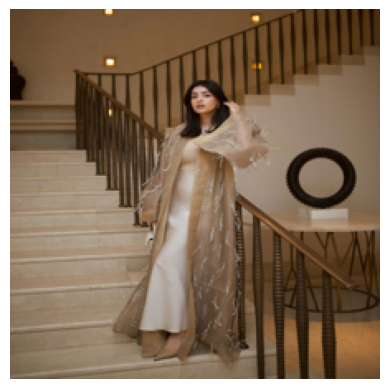

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already loaded and processed the images into resized_image_matrices_array

# Get the first image from the array
first_image = resized_image_matrices_array[0]

# Display the first image using matplotlib
plt.imshow(first_image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
import os
from PIL import Image
import numpy as np

# Path to the parent folder containing subfolders with images
parent_folder_path = '/content/drive/MyDrive/PFA-Dataset/Images/'

# List all subfolders in the parent folder
subfolders = [f.path for f in os.scandir(parent_folder_path) if f.is_dir()]

# Standard size for resizing
target_size = (224, 224)

for folder_path in subfolders:
    # List all files in the subfolder
    image_files = os.listdir(folder_path)

    # Initialize an empty list to store resized image matrices
    resized_image_matrices = []

    # Iterate through each image file in the subfolder
    for image_file in image_files:
        # Construct the full path to the image
        image_path = os.path.join(folder_path, image_file)

        # Load the image using Pillow
        image = Image.open(image_path)

        # Resize the image to the target size
        resized_image = image.resize(target_size)

        # Convert the resized image to a NumPy array
        resized_image_array = np.array(resized_image)

        # Append the resized image matrix to the list
        resized_image_matrices.append(resized_image_array)

    # Convert the list of resized image matrices to a NumPy array
    resized_image_matrices_array = np.array(resized_image_matrices)

    # Save the array of resized image matrices to a file
    output_file = os.path.join(folder_path, 'resized_images.npy')
    np.save(output_file, resized_image_matrices_array)

    # Print the shape of the resulting array
    print(f"Folder: {folder_path}, Shape of the array of resized image matrices:", resized_image_matrices_array.shape)


#test